# Logistic Regression Project 

**Situation:** In this project I've worked with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I tried to create a model that will predict whether or not they will click on an ad based off the features of that user.

<code style="color:blue">This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables</code>

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data
This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [2]:
ad_data = pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Age', ylabel='Count'>

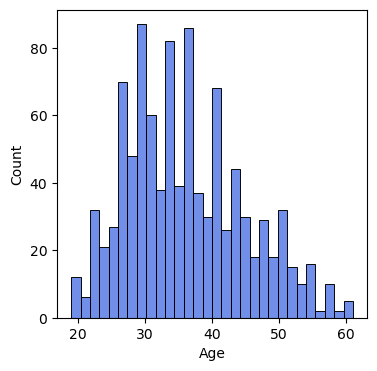

In [6]:
# Creating a histogram of the Age
plt.figure(figsize=(4,4))
sns.histplot(ad_data['Age'], bins=30, color='royalblue')

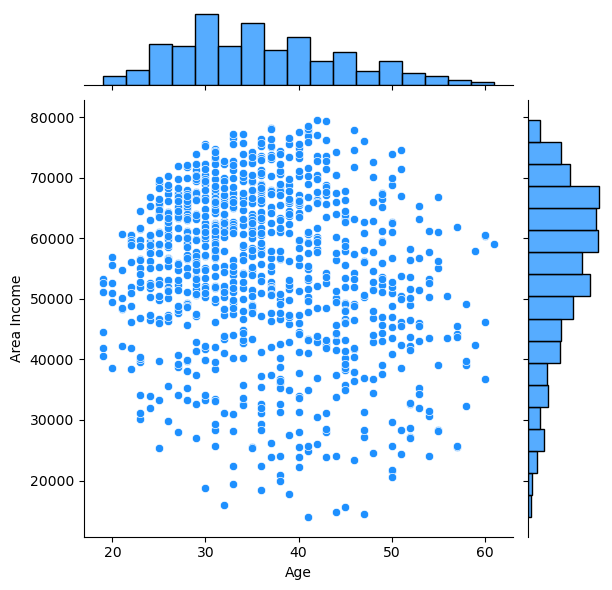

In [7]:
# Creating a jointplot showing Area Income versus Age
sns.jointplot(x=ad_data['Age'], y=ad_data['Area Income'], kind='scatter', height = 6, color='dodgerblue')

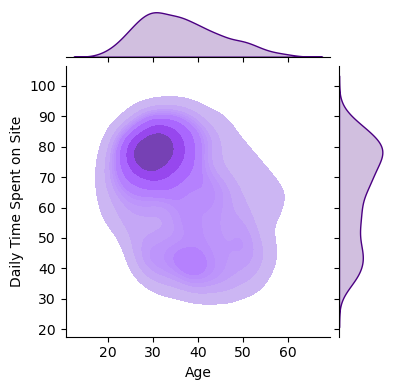

In [8]:
# Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age
sns.jointplot(x=ad_data['Age'], y=ad_data['Daily Time Spent on Site'], kind='kde', color='indigo', fill=True, height = 4)

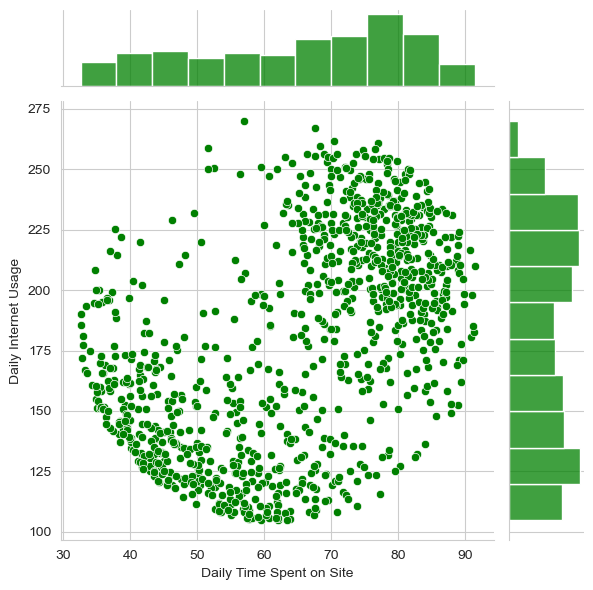

In [9]:
# Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.set_style('whitegrid')
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='green')


** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

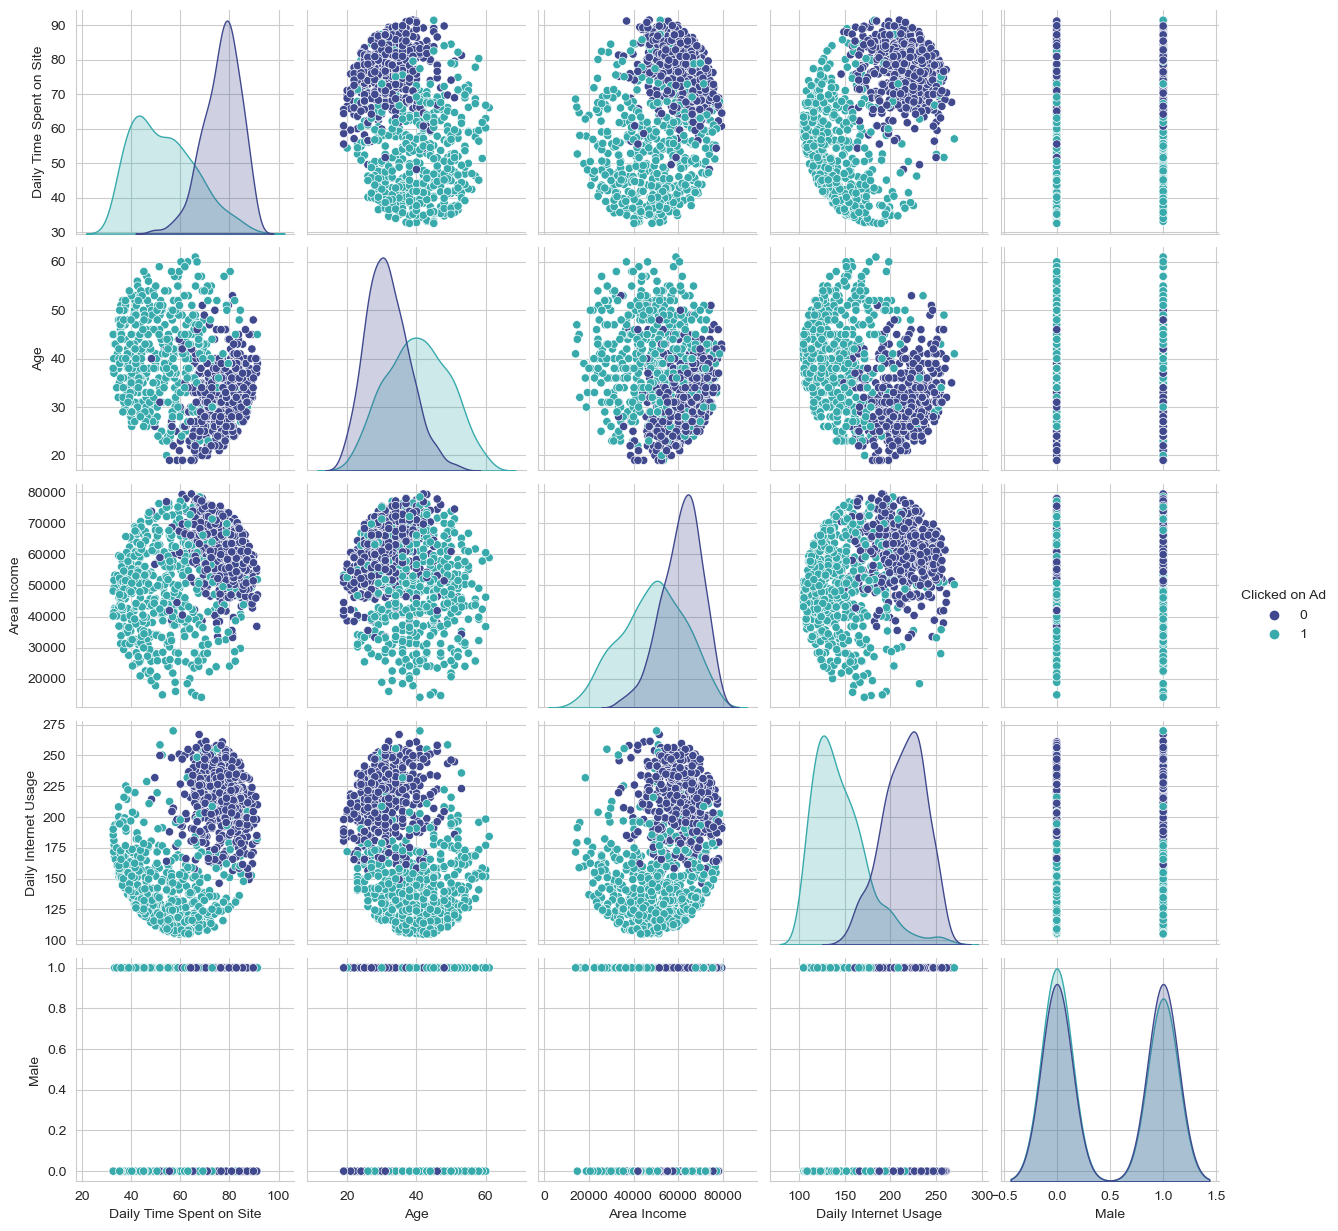

In [10]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='mako')

___
## Machine Learning Section - Logistic Regression


### Training and Testing Data

I splited the data into training and testing sets for start to develop the machine learning model 

In [11]:
# Seting a variable X equal to the numerical features of the customers and a variable y equal to the "Clicked on Ad"
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage','Male']] 
y = ad_data['Clicked on Ad']

In [12]:
# Using model_selection.train_test_split from sklearn to split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

### Train the Model

In [13]:
# Importing LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Creating an instance of a LogisticRegression() model named logmodel
logmodel = LogisticRegression()

In [14]:
# Train/fit lm on the training data
logmodel.fit(X_train, y_train)

LogisticRegression()

### Predicting Test Data

Evaluating the model performance by predicting off the test values

In [15]:
# Using logmodel.predict() to predict off the X_test set of the data
predictions = logmodel.predict(X_test)

### Evaluating the Model

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [18]:
# Confusion_matrix: displays the distribution of records in terms of their current classes and their predicted classes
print(confusion_matrix(y_test,predictions))

[[156   6]
 [ 25 143]]


### Conclusion

We can see from the metrics above that the model is able to predict the results well (91% accuracy), that is, whether or not the customer will click on the company's advertisement

## Thanks!

**Nícolas de Souza**